# Etapa 2 - Conociendo los datos
## Histórico de Precios: Productos Terminados
### Plate (Placa de Hoja)
El conjunto de datos se refiere al precio de placas de acero al carbono cortadas a medida, bajo condiciones FOB (Free on Board) en molino en los Estados Unidos. Estas placas son utilizadas en diversas aplicaciones industriales y estructurales.

#### Variables
- $Date$: Fecha en que se registró el precio del producto. Es categórica y sus valores posibles están en formato "d/m/aaaa", desde el primer registro hasta el presente.
- $Low$: Precio más bajo registrado para el producto en la fecha especificada. Es numérica y sus valores posibles están en dólares estadounidenses por quintal (cwt), desde 0 hasta el máximo registrado.
- $Mid$: Precio medio registrado para el producto en la fecha especificada. Es numérica y sus valores posibles están en dólares estadounidenses por quintal (cwt), desde 0 hasta el máximo registrado.
- $High$: Precio más alto registrado para el producto en la fecha especificada. Es numérica y sus valores posibles están en dólares estadounidenses por quintal (cwt), desde 0 hasta el máximo registrado.
- $Mid$ $Change$ $\%$: Cambio porcentual en el precio medio en comparación con el período anterior (nuevo-anterior)/anterior. Es numérica y sus valores posibles están enre -1 (-100%) y el máximo cambio positivo registrado.

#### Librerías

In [ ]:
import pandas as pd # Análisis de datos.
import matplotlib.pyplot as plt # Gráficos.
import seaborn as sns # Formato de los gráficos.

#### Comprensión de los datos

In [ ]:
# Leer el archivo Excel:
platePlacaDeHoja_df = pd.read_excel('Plate (Placa de Hoja).xlsx',
  skiprows=9, nrows=671-9, engine='openpyxl')

# Mostrar las primeras filas del DataFrame:
platePlacaDeHoja_df

,Date,Low,Mid,High,Mid Change %
0,18/3/2025,60.0,60.0,60.0,0.000000
1,11/3/2025,60.0,60.0,60.0,0.000000
2,4/3/2025,60.0,60.0,60.0,0.132075
3,25/2/2025,53.0,53.0,53.0,0.177778
4,18/2/2025,45.0,45.0,45.0,0.000000
...,...,...,...,...,...
656,21/12/2000,12.0,12.0,12.0,-0.250000
657,6/4/2000,16.0,16.0,16.0,0.066667
658,21/9/1999,15.0,15.0,15.0,-0.117647
659,19/3/1999,17.0,17.0,17.0,0.000000


Son 661 filas y 5 columnas.

Se agruparán los datos anteriores por mes, y se quitará la columna de 'Mid Change %', pues no es de interés para los objetivos de nuestro proyecto. De las demás columnas se obtendrá un promedio mensual.

In [ ]:
# Convertir la columna 'Date' a tipo datetime, considerando el formato d/m/aaaa:
platePlacaDeHoja_df['Date'] = pd.to_datetime(platePlacaDeHoja_df['Date'], dayfirst=True)

# Establecer 'Date' como índice:
platePlacaDeHoja_df.set_index('Date', inplace=True)

# Re-muestrear los datos a nivel mensual y obtener el promedio de las columnas 'Low', 'Mid' y 'High':
platePlacaDeHoja_df = platePlacaDeHoja_df.resample('M')[['Low', 'Mid', 'High']].mean()

# Opcional: Reiniciar el índice para tener 'Date' como columna nuevamente:
platePlacaDeHoja_df = platePlacaDeHoja_df.reset_index()

# Formatear la columna 'Date' para mostrar 'NombreMes Año':
platePlacaDeHoja_df['Date'] = platePlacaDeHoja_df['Date'].dt.strftime('%B %Y')

# Mostrar el DataFrame resultante:
platePlacaDeHoja_df

<ipython-input-19-8f353ba9b921>:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  platePlacaDeHoja_df = platePlacaDeHoja_df.resample('M')[['Low', 'Mid', 'High']].mean()


,Date,Low,Mid,High
0,February 1999,17.00,17.00,17.00
1,March 1999,17.00,17.00,17.00
2,April 1999,NaN,NaN,NaN
3,May 1999,NaN,NaN,NaN
4,June 1999,NaN,NaN,NaN
...,...,...,...,...
309,November 2024,42.50,42.50,42.50
310,December 2024,42.20,42.20,42.20
311,January 2025,42.25,42.25,42.25
312,February 2025,46.75,46.75,46.75


Ahora son 314 filas y 4 columnas.

#### Calidad de los datos

In [ ]:
# Contar datos nulos de cada columna:
valores_nulos_por_columna = platePlacaDeHoja_df.isnull().sum()
valores_nulos_por_columna.name = 'Valores Nulos'
valores_nulos_por_columna

,Valores Nulos
Date,0
Low,96
Mid,96
High,96


Los valores nulos se dan porque hay meses en el dataframe original en los que no hay cambio de precio, se hará una interpolación del último dato no nulo anterior y el primer dato no nulo posterior.

In [ ]:
# Aplicar la interpolación lineal a las columnas 'Low', 'Mid' y 'High':
platePlacaDeHoja_df[['Low', 'Mid', 'High']] = platePlacaDeHoja_df[['Low', 'Mid', 'High']].interpolate(method='linear', limit_direction='both')

In [ ]:
valores_nulos_por_columna = platePlacaDeHoja_df.isnull().sum()
valores_nulos_por_columna.name = 'Valores Nulos'
valores_nulos_por_columna

,Valores Nulos
Date,0
Low,0
Mid,0
High,0


Ya no hay datos nulos.

In [ ]:
# Contar registros duplicados:
num_duplicados = platePlacaDeHoja_df.duplicated().sum()
print(f"Número de registros duplicados: {num_duplicados}")

# Visualizar los registros duplicados (si existen):
if num_duplicados > 0:
    duplicados = platePlacaDeHoja_df[platePlacaDeHoja_df.duplicated()]
    print("Registros duplicados:")
    print(duplicados)

Número de registros duplicados: 0


In [ ]:
# Detectar registros con valores fuera del rango esperado:
erroneos = platePlacaDeHoja_df[(platePlacaDeHoja_df['Low'] < 0) | (platePlacaDeHoja_df['Mid'] < 0) | (platePlacaDeHoja_df['High'] < 0)]
print("Registros con valores erróneos en 'Low':")
print(erroneos)

Registros con valores erróneos en 'Low':
Empty DataFrame
Columns: [Date, Low, Mid, High]
Index: []


Los precios están dentro del rango correcto.

In [ ]:
platePlacaDeHoja_df.dtypes # Tipos de dato.

,0
Date,object
Low,float64
Mid,float64
High,float64


Todos los datos tienen el tipo correcto.

#### Medidas estadísticas

In [ ]:
# Lista de columnas cuantitativas:
numeric_columns = ['Low', 'Mid', 'High']

for col in numeric_columns:
    print(f"Variable: {col}")
    # Medidas de tendencia central:
    media = platePlacaDeHoja_df[col].mean()
    mediana = platePlacaDeHoja_df[col].median()
    # La moda puede devolver más de un valor, por eso se imprime como Series:
    moda = platePlacaDeHoja_df[col].mode()

    # Medidas de dispersión:
    rango = platePlacaDeHoja_df[col].max() - platePlacaDeHoja_df[col].min()
    varianza = platePlacaDeHoja_df[col].var()
    desv_estandar = platePlacaDeHoja_df[col].std()

    print(f"  Promedio/Media: {media}")
    print(f"  Mediana: {mediana}")
    print(f"  Moda: {list(moda)}") # Serie a lista para mayor claridad.
    print(f"  Rango (max - min): {rango}")
    print(f"  Varianza: {varianza}")
    print(f"  Desviación Estándar: {desv_estandar}\n")

Variable: Low
  Promedio/Media: 39.6278237791932
  Mediana: 38.68333333333334
  Moda: [40.0]
  Rango (max - min): 82.8
  Varianza: 359.115365676085
  Desviación Estándar: 18.95033946070848

Variable: Mid
  Promedio/Media: 39.735307855626324
  Mediana: 38.9375
  Moda: [32.0, 40.5]
  Rango (max - min): 82.8
  Varianza: 359.4012700125861
  Desviación Estándar: 18.957881474800555

Variable: High
  Promedio/Media: 39.84279193205944
  Mediana: 39.0
  Moda: [42.0]
  Rango (max - min): 82.8
  Varianza: 359.85078490058436
  Desviación Estándar: 18.969733390340107



Cada variable tiene sus medidas de tendencia central y dispersión muy similares.

In [ ]:
# Tabla de distribución de frecuencia para la variable 'Date':
frecuencia_date = platePlacaDeHoja_df['Date'].value_counts().sort_index()
print("Tabla de distribución de frecuencia (Date):")
print(frecuencia_date)
print("\n")

# Ahora, calcular la mediana de la columna 'Date':
median_date = pd.to_datetime(platePlacaDeHoja_df['Date'], dayfirst=True).median()

# Mostrar la mediana formateada:
print("Mediana de las fechas:", median_date.strftime("%B %Y"))

Tabla de distribución de frecuencia (Date):
Date
April 1999        1
April 2000        1
April 2001        1
April 2002        1
April 2003        1
                 ..
September 2020    1
September 2021    1
September 2022    1
September 2023    1
September 2024    1
Name: count, Length: 314, dtype: int64


Mediana de las fechas: February 2012


<ipython-input-27-38ce5c9a9e00>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  median_date = pd.to_datetime(platePlacaDeHoja_df['Date'], dayfirst=True).median()


Cada fecha es única.

##### Exploración de datos

In [ ]:
# Cuartiles, medidas de posición no-central (no solo la mediana) y detección de outliers:
print("Medidas de posición y dispersión (para variables numéricas):")
for col in ['Low', 'Mid', 'High']:
    Q1 = platePlacaDeHoja_df[col].quantile(0.25)
    Q3 = platePlacaDeHoja_df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = platePlacaDeHoja_df[(platePlacaDeHoja_df[col] < (Q1 - 1.5 * IQR)) | (platePlacaDeHoja_df[col] > (Q3 + 1.5 * IQR))][col]

    print(f"\nVariable: {col}")
    print(f"  Cuartil 1 (Q1): {Q1}")
    print(f"  Cuartil 3 (Q3): {Q3}")
    print(f"  IQR: {IQR}")
    print(f"  Outliers detectados: {list(outliers)}")

Medidas de posición y dispersión (para variables numéricas):

Variable: Low
  Cuartil 1 (Q1): 28.18125
  Cuartil 3 (Q3): 46.453125
  IQR: 18.271875
  Outliers detectados: [75.0, 74.0, 77.4, 84.0, 87.25, 89.0, 90.1875, 90.75, 90.75, 90.5625, 91.5, 94.55, 94.8, 90.75, 89.5, 87.0, 84.25, 79.25, 78.8, 75.375, 77.0, 77.8, 76.0, 75.0, 74.9, 74.125]

Variable: Mid
  Cuartil 1 (Q1): 28.18125
  Cuartil 3 (Q3): 46.453125
  IQR: 18.271875
  Outliers detectados: [75.0, 74.0, 77.4, 84.0, 87.25, 89.0, 90.1875, 90.75, 90.75, 90.5625, 91.5, 94.55, 94.8, 90.75, 89.5, 87.0, 84.25, 79.25, 78.8, 75.375, 77.0, 77.8, 76.0, 75.0, 74.9, 74.125]

Variable: High
  Cuartil 1 (Q1): 28.18125
  Cuartil 3 (Q3): 46.5
  IQR: 18.31875
  Outliers detectados: [75.0, 74.0, 77.4, 84.0, 87.25, 89.0, 90.1875, 90.75, 90.75, 90.5625, 91.5, 94.55, 94.8, 90.75, 89.5, 87.0, 84.25, 79.25, 78.8, 75.375, 77.0, 77.8, 76.0, 75.0, 74.9, 74.125]


Cada variable tiene sus medidas de posición muy similares

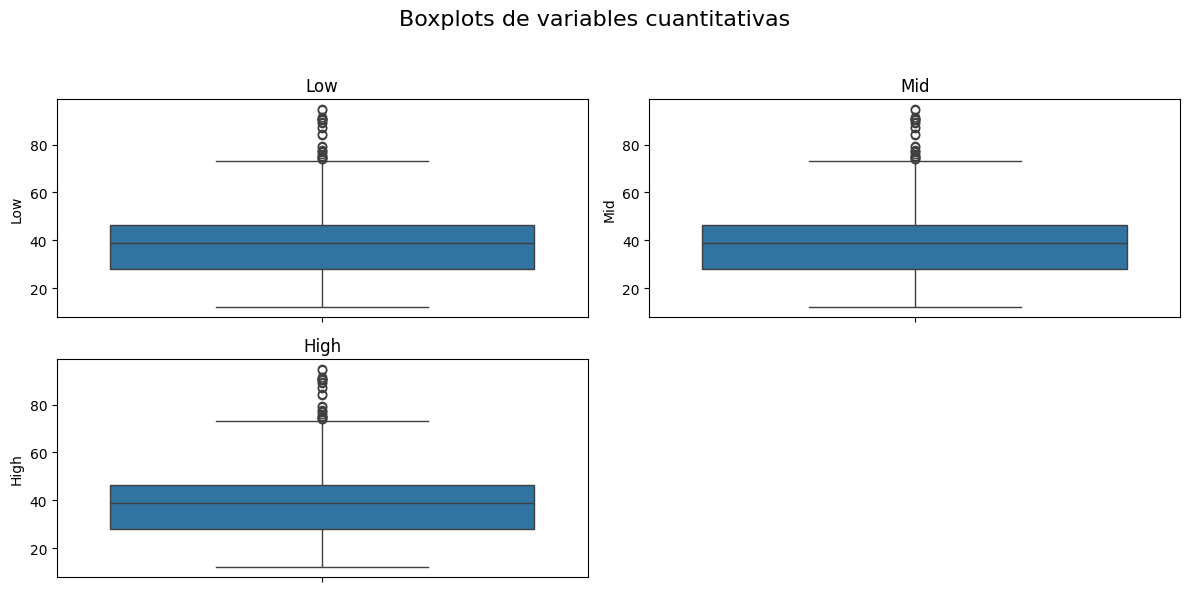

In [ ]:
# Boxplots para visualizar la distribución y detectar outliers:
plt.figure(figsize=(12, 6))
plt.suptitle("Boxplots de variables cuantitativas", fontsize=16)
for i, col in enumerate(['Low', 'Mid', 'High'], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=platePlacaDeHoja_df[col])
    plt.title(col)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Se observa en los boxplots que los datos atípicos están en la misma posición y que el tercer cuartil está más cerca de la mediana que el primer cuartil.

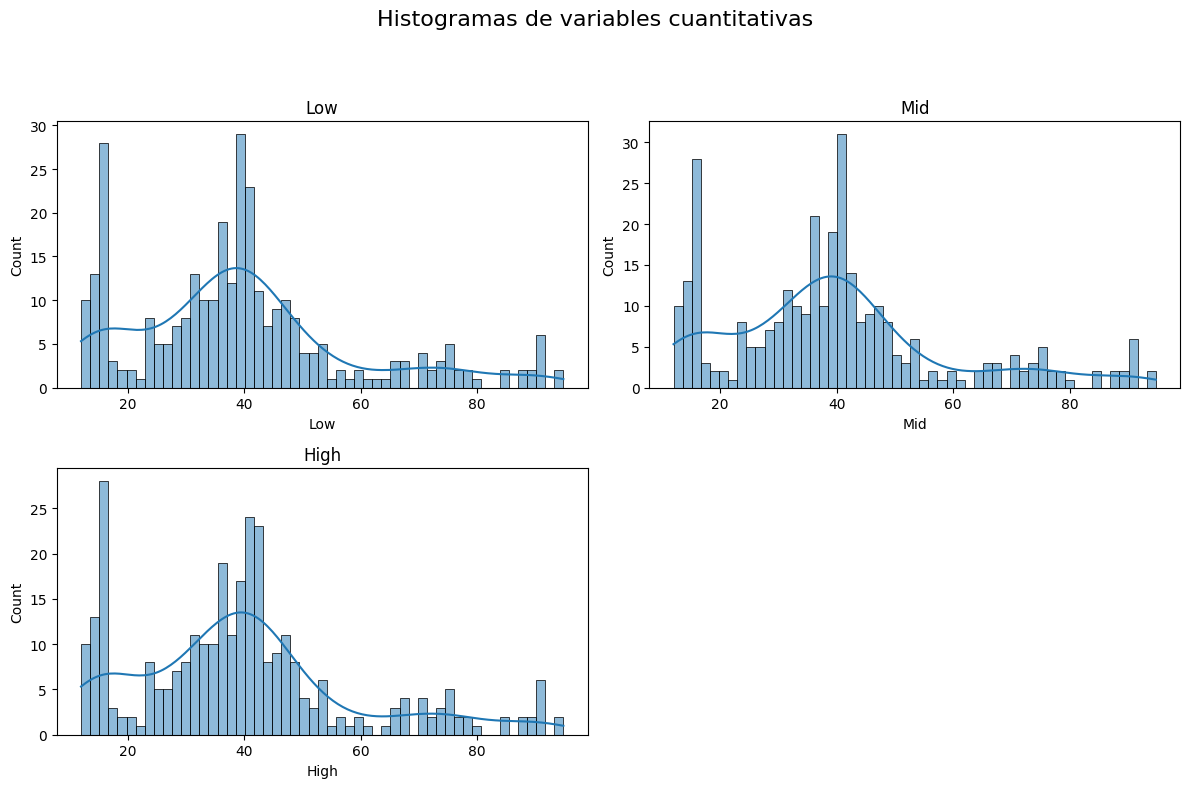

In [ ]:
# Histogramas para analizar la distribución y ver la forma (simétrica/asimétrica):
plt.figure(figsize=(12, 8))
plt.suptitle("Histogramas de variables cuantitativas", fontsize=16)
for i, col in enumerate(['Low', 'Mid', 'High'], 1):
    plt.subplot(2, 2, i)
    sns.histplot(platePlacaDeHoja_df[col], kde=True, bins=53)
    plt.title(col)
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()

Se observa un ligero sesgo a la izquierda en la distribución, pues los datos más altos se agrupan más cerca de la mediana.

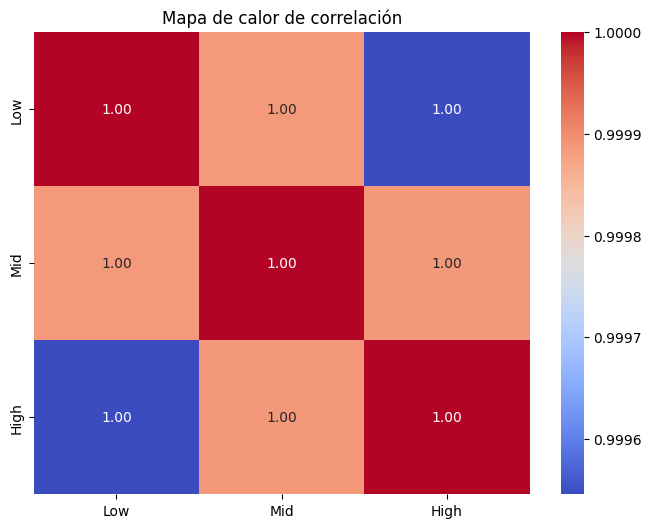

In [ ]:
# Mapa de calor de la correlación entre variables numéricas:
plt.figure(figsize=(8, 6))
corr_matrix = platePlacaDeHoja_df[['Low', 'Mid', 'High']].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de calor de correlación")
plt.show()

Todas las variables tienen una correlación casi perfecta positiva.

Cada fecha es única, así que si se quieren ver distribuciones de la variable que no sean uniformes para obtener gráficos de barras y de pastel más interesantes, se puede realizar transformaciones a la variable 'Date'.

#### Exportación de los datos

In [ ]:
# Exportar a CSV:
platePlacaDeHoja_df.to_csv('platePlacaDeHoja.csv', index=False)